In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [70]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    image_lower_hsv = np.array([0, 0, 100])
    image_upper_hsv = np.array([180, 255, 255])

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

    bandeira_contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # definindo máscaras para as cores
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])

    lower_red2 = np.array([160, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    lower_orange = np.array([5, 100, 100])
    upper_orange = np.array([25, 255, 255])

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([90, 255, 255])

    lower_white = np.array([0, 0, 180])
    upper_white = np.array([255, 40, 255])

    resultado = []

    for contorno in bandeira_contornos:
        x, y, w, h = cv2.boundingRect(contorno)

        bandeira_hsv = img_hsv[y:y+h, x:x+w]

        # definindo as máscaras
        red_mask = cv2.bitwise_or(
          cv2.inRange(bandeira_hsv, lower_red1, upper_red1),
          cv2.inRange(bandeira_hsv, lower_red2, upper_red2)
        )

        orange_mask = cv2.inRange(bandeira_hsv, lower_orange, upper_orange)
        green_mask = cv2.inRange(bandeira_hsv, lower_green, upper_green)
        white_mask = cv2.inRange(bandeira_hsv, lower_white, upper_white)

        pixels = w*h

        red_pixels = cv2.countNonZero(red_mask)/pixels
        orange_pixels = cv2.countNonZero(orange_mask)/pixels
        green_pixels = cv2.countNonZero(green_mask)/pixels
        white_pixels = cv2.countNonZero(white_mask)/pixels

        # identificando os padrões de bandeiras com base nas cores
        pais = ""

        # itália (verde, branco e vermelho)
        if red_pixels >= 0.3 and white_pixels >= 0.3 and green_pixels >= 0.3:
          pais = "italia"
        # irlanda (verde, branco e laranja)
        elif orange_pixels >= 0.3 and white_pixels >= 0.3 and green_pixels >= 0.3:
          pais = "irlanda"
        # peru (vermelho, branco e vermelho)
        elif red_pixels >= 0.6 and white_pixels >= 0.3:
          pais = "peru"
        # mônaco (vermelho e branco)
        elif red_pixels == 0.5 and white_pixels == 0.5:
          pais = "monaco"
        # singapura (branco e vermelho)
        elif red_pixels >= 0.4 and white_pixels >= 0.5:
          pais = "singapura"

        bandeira = (pais, (x, y), (x + w, y + h))
        resultado.append(bandeira)

    return resultado


In [28]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('singapura', (192, 497), (457, 673)), ('monaco', (726, 163), (984, 369)), ('peru', (119, 121), (380, 296))]


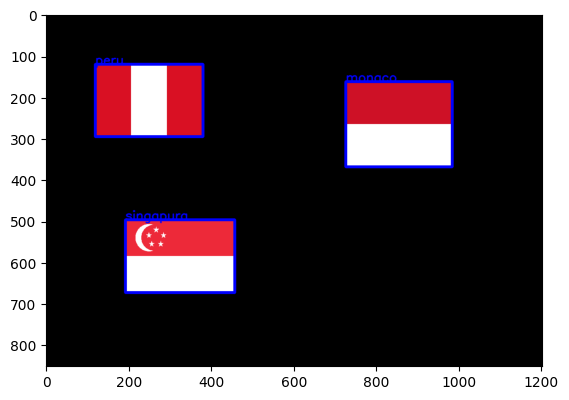

In [71]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas

img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


